In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
def sign(num):
    if num>0:
        return 1
    else:
        return -1

In [3]:
dimensions=2
regularizationWeighting=np.arange(-10,3,1,dtype=float)
regularizationWeighting=10 ** regularizationWeighting
x=[]
for i in range(dimensions+1):
    x.append([])
y=[]

In [4]:
#read training data
with open('../hw4_train.dat') as f:
    for line in f:
        for i,value in enumerate(line.split()):
            if i<dimensions:
                x[i+1].append(float(value))
            else:
                y.append(int(value))
    f.close()
x[0]=np.ones(len(x[1]))
x=np.array(x)
x_train=x[:,0:120]
y_train=y[0:120]
x_val=x[:,120:]
y_val=y[120:]

In [5]:
#read testing data
x_test=[]
for i in range(dimensions+1):
    x_test.append([])
y_test=[]
with open('../hw4_test.dat') as f:
    for line in f:
        for i,value in enumerate(line.split()):
            if i<dimensions:
                x_test[i+1].append(float(value))
            else:
                y_test.append(int(value))
    f.close()
x_test[0]=np.ones(len(x_test[1]))

In [6]:
EtrainRecord=[]
EvalRecord=[]
EoutRecord=[]

In [7]:
for k in range(len(regularizationWeighting)):
    #training
    x_train=np.matrix(x_train)
    x_train=np.transpose(x_train)
    y_train=np.matrix(y_train)
    y_train=np.transpose(y_train)
    w=np.linalg.inv(np.transpose(x_train)*x_train+regularizationWeighting[k]*np.identity(dimensions+1))* np.transpose(x_train) * y_train
    #testing
    x_train=np.transpose(x_train)
    x_train=np.array(x_train)
    Etrain=0
    for i in range(len(x_train[2])):
        result=0
        for j in range(dimensions+1):
            result+=w[j]*x_train[j][i]
        if sign(result) !=  y_train[i]:
            Etrain+=1
    Etrain/=len(x_train[2])
    EtrainRecord.append(Etrain)
    #validation
    Eval=0
    for i in range(len(x_val[2])):
        result=0
        for j in range(dimensions+1):
            result+=w[j]*x_val[j][i]
        if sign(result) !=  y_val[i]:
            Eval+=1
    Eval/=len(x_val[2])
    EvalRecord.append(Eval)
    Eout=0
    for i in range(len(x_test[2])):
        result=0
        for j in range(dimensions+1):
            result+=w[j]*x_test[j][i]
        if sign(result) != y_test[i]:
            Eout+=1
    Eout/=len(x_test[2])
    EoutRecord.append(Eout)
    y_train=np.transpose(y_train)

In [8]:
print("Etrain:",EtrainRecord)
print("Eval:",EvalRecord)
print("Eout:",EoutRecord)

Etrain: [0.008333333333333333, 0.0, 0.0, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.075, 0.3416666666666667]
Eval: [0.125, 0.1, 0.05, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.0375, 0.125, 0.4125]
Eout: [0.04, 0.038, 0.025, 0.021, 0.021, 0.021, 0.021, 0.021, 0.021, 0.022, 0.028, 0.08, 0.414]


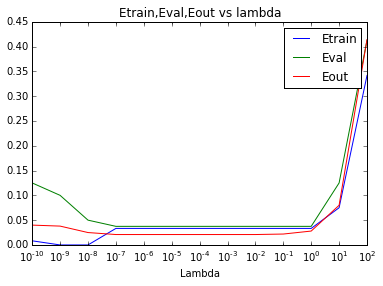

In [9]:
lineEtrain,=plt.semilogx(regularizationWeighting, EtrainRecord)
lineEval,=plt.semilogx(regularizationWeighting, EvalRecord)
lineEout,=plt.semilogx(regularizationWeighting, EoutRecord)
plt.title("Etrain,Eval,Eout vs lambda")
plt.legend([lineEtrain, lineEval,lineEout], ["Etrain","Eval" ,"Eout"])
plt.xlabel("Lambda")